In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics

#LINEAR REGRESSION


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Antariksh/bottle.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [ ]:
df.drop(df.loc[:,df.isnull().sum()/len(df)*100.00 > 7],axis=1,inplace=True) #Dropping Columns with more than 10% Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     864863 non-null  int64  
 1   Btl_Cnt     864863 non-null  int64  
 2   Sta_ID      864863 non-null  object 
 3   Depth_ID    864863 non-null  object 
 4   Depthm      864863 non-null  int64  
 5   T_degC      853900 non-null  float64
 6   Salnty      817509 non-null  float64
 7   STheta      812174 non-null  float64
 8   RecInd      864863 non-null  int64  
 9   T_prec      853900 non-null  float64
 10  S_prec      817509 non-null  float64
 11  NH3q        808299 non-null  float64
 12  C14A1q      848605 non-null  float64
 13  C14A2q      848623 non-null  float64
 14  DarkAq      840440 non-null  float64
 15  MeanAq      840439 non-null  float64
 16  R_Depth     864863 non-null  float64
 17  R_TEMP      853900 non-null  float64
 18  R_POTEMP    818816 non-null  float64
 19  R_

In [ ]:
# WE WILL BE CHECKING FOR T vs SALINITY

In [ ]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new
def standardize(data_list):
  X_new=[]
  for i in data_list:
    X_new.append((i-data_list.mean())/data_list.std())
  return X_new
df["Salnty"]=df["Salnty"].fillna(df["Salnty"].mean()) #Filling null values of Salnty with their mean
df["T_degC"]=df["T_degC"].fillna(df["T_degC"].mean()) #Filling null values of Temp with their mean
# df["T_degC"]=normalize(df["T_degC"])
# df["Salnty"]=normalize(df["Salnty"])
df["Salnty"]=(df["Salnty"]-df["Salnty"].mean())/df["Salnty"].std()
df["T_degC"]=(df["T_degC"]-df["T_degC"].mean())/df["T_degC"].std()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     864863 non-null  int64  
 1   Btl_Cnt     864863 non-null  int64  
 2   Sta_ID      864863 non-null  object 
 3   Depth_ID    864863 non-null  object 
 4   Depthm      864863 non-null  int64  
 5   T_degC      864863 non-null  float64
 6   Salnty      864863 non-null  float64
 7   STheta      812174 non-null  float64
 8   RecInd      864863 non-null  int64  
 9   T_prec      853900 non-null  float64
 10  S_prec      817509 non-null  float64
 11  NH3q        808299 non-null  float64
 12  C14A1q      848605 non-null  float64
 13  C14A2q      848623 non-null  float64
 14  DarkAq      840440 non-null  float64
 15  MeanAq      840439 non-null  float64
 16  R_Depth     864863 non-null  float64
 17  R_TEMP      853900 non-null  float64
 18  R_POTEMP    818816 non-null  float64
 19  R_

In [ ]:
df2=pd.DataFrame()
df2["T_degC"]=df["T_degC"]
df2["Salnty"]=df["Salnty"]
X=pd.DataFrame()
X["T_degC"]=df["T_degC"]
y=pd.DataFrame()
y["Salnty"]=df["Salnty"]
print(X.info(),y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  864863 non-null  float64
dtypes: float64(1)
memory usage: 6.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  864863 non-null  float64
dtypes: float64(1)
memory usage: 6.6 MB
None None


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(605404, 1)
(605404, 1)
(259459, 1)
(259459, 1)


In [ ]:
linReg=LinearRegression()

In [ ]:
linReg.fit(X_train,y_train)

LinearRegression()

In [ ]:
linPred=linReg.predict(X_test)

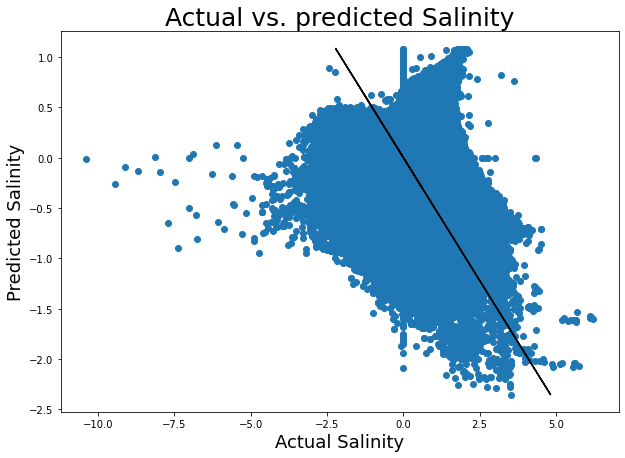

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted Salinity",fontsize=25)
plt.xlabel("Actual Salinity",fontsize=18)
plt.ylabel("Predicted Salinity", fontsize=18)
plt.scatter(x=y_test,y=linPred)
plt.plot(X_test, linPred,color='k') 

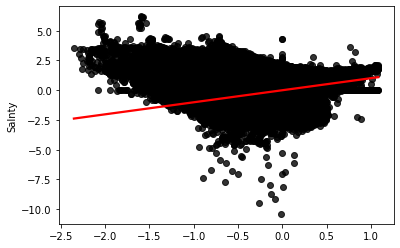

In [ ]:
sns.regplot(x=linPred,y=y_test,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

In [ ]:
print("PREDICTIONS",linPred)
print("R2 Score", metrics.r2_score(y_test,linPred))
print("MAE Score", metrics.mean_absolute_error(y_test,linPred))
print("TEST ACC",linReg.score(X_test,y_test))
print("TRAIN ACC",linReg.score(X_train,y_train))

PREDICTIONS [[-0.31530925]
 [-0.03956317]
 [ 0.38875776]
 ...
 [ 0.38065439]
 [ 0.02294853]
 [ 0.62838596]]
R2 Score 0.2434826859467749
MAE Score 0.6172765280639664
TEST ACC 0.2434826859467749
TRAIN ACC 0.23859719724411854


In [ ]:
df2.corr()

,T_degC,Salnty
T_degC,1.000000,-0.489967
Salnty,-0.489967,1.000000


In [ ]:
y_pred_classes = np.zeros_like(linPred)
y_pred_classes[linPred > 0] = 1
y_test_classes = np.zeros_like(linPred)
y_test_classes[y_test > 0] = 1

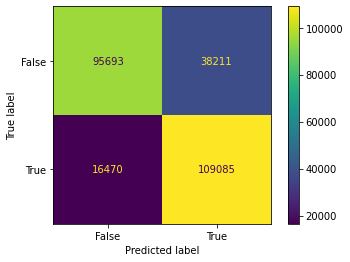

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print("R2 Score", metrics.r2_score(y_test_classes, y_pred_classes))


R2 Score 0.15612596316826943


#LOGISTIC REGRESSION

In [ ]:
logDF=pd.read_csv("/content/gdrive/MyDrive/Antariksh/Bank Customer Churn Prediction.csv")
logDF

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
logDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
logDF.drop(["customer_id","gender","country"],axis=1,inplace=True)

In [ ]:
X=logDF.drop(["churn"],axis=1)
y=pd.DataFrame(logDF["churn"])
# X=(X-X.mean())/X.std()
X=(X-X.min())/(X.max()-X.min())
X1=pd.read_csv('/content/final_train_dataset.xlsx')
y1=pd.read_csv('/content/final_test_dataset - final_test_dataset.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 8)
(7000, 1)
(3000, 8)
(3000, 1)


In [ ]:
logModel=LogisticRegression()
logModel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
logPred=logModel.predict(X_test)

In [ ]:
print('TEST ACC',logModel.score(X_test,y_test))
print("TRAIN ACC",logModel.score(X_train,y_train))
print("MAE Score", metrics.mean_absolute_error(y_test,logPred))

TEST ACC 0.8003333333333333
TRAIN ACC 0.8095714285714286
MAE Score 0.19966666666666666


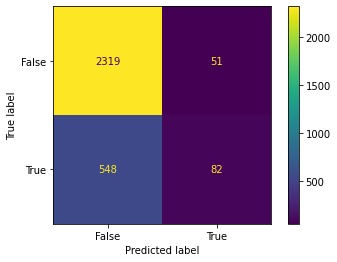

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, logPred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
logDF.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


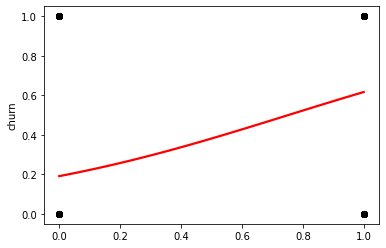

In [ ]:
sns.regplot(x=logPred,y=y_test,logistic=True,ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})